In [51]:
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
positive = pd.read_csv('positive_words.txt')
negative = pd.read_csv('negative_words.txt')

In [53]:
game_dic = {"alden ring":[], 'other game': [], 'game hour': []}
game_data = pd.DataFrame(data=game_dic)
user_response = []

In [54]:
pos_list = positive['positive_words'].tolist()
neg_list = negative['negative_words'].tolist()

In [55]:
def isFloat(s):
   try:
      float(s)
      return True
   except:
      return False

In [63]:
quit = ["q", 'bye', 'stop', 'quit']
game_pref = {}
neg_count = 0
pos_count = 0
neu_count = 0

user_count = 0

while user_count < 3:
    user_count += 1

    user = input("Hi, how's it going?")

    while user.lower() not in quit:
        user = input("It's nice to meet you! How do you think about Alden Ring?")
        sentiment = user.split()
        for i in sentiment:
            if i.lower() in neg_list:
                neg_count += 1
            elif i.lower() in pos_list:
                pos_count += 1
            else:
                neu_count += 1
        print(neg_count, pos_count, neu_count)
        if user.lower() not in quit:
            if neg_count < pos_count and neg_count < 3 and (neu_count/len(sentiment)) < 0.8:
                game_pref['alden_ring'] = 'love'
                user = input('Sounds good! Do you play other games?')
                game_pref['other_game'] = user
            elif neg_count > pos_count and (neu_count/len(sentiment)) < 0.8:
                game_pref['alden_ring'] = 'hate'
                user = input('Ok then...What is your favorite game?')
                game_pref['other_game'] = user
            else: 
                game_pref['alden_ring'] = 'neutral'
                user = input('Alright. Do you have other game recommendation?')
                game_pref['other_game'] = user
            if user.lower() not in quit:
                user = input('That is interesting. How much time do you spend on playing game every week?')
                if user.lower() not in quit:
                    game_pref['time'] = user
                    if isFloat(user) is True:
                        user = input('Is the time in hour, minute, or seconds?')
                        if user.lower() not in quit:
                            game_pref['time'] += " " + user
        user_response.append(game_pref)
        game_pref = {}
        neg_count = 0
        pos_count = 0
        neu_count = 0
        user = "quit"
        print('Thank you! Goodbye')

Hi, how's it going?good
It's nice to meet you! How do you think about Alden Ring?love it
0 1 1
Sounds good! Do you play other games?stardew valley
That is interesting. How much time do you spend on playing game every week?10 hour
Thank you! Goodbye
Hi, how's it going?good
It's nice to meet you! How do you think about Alden Ring?hate it
1 0 1
Ok then...What is your favorite game?gta 5
That is interesting. How much time do you spend on playing game every week?1 hour
Thank you! Goodbye
Hi, how's it going?good
It's nice to meet you! How do you think about Alden Ring?it is ok
0 0 3
Alright. Do you have other game recommendation?stardew valley
That is interesting. How much time do you spend on playing game every week?1 hour
Thank you! Goodbye


In [64]:
user_input = pd.DataFrame(user_response)

In [65]:
user_input

,alden_ring,other_game,time
0,love,stardew valley,10 hours
1,neutral,gta 5,5 hour
2,neutral,no,10 hour
3,love,stardew valley,10 hour
4,neutral,quit,NaN
5,love,stardew valley,10 hour
6,hate,gta 5,1 hour
7,neutral,stardew valley,1 hour


<AxesSubplot:ylabel='How do you think about alden ring?'>

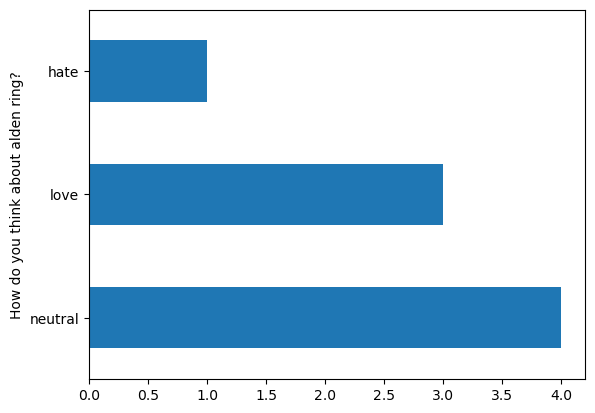

In [66]:
user_input['alden_ring'].value_counts().plot(kind='barh', xlabel="How do you think about alden ring?")

<AxesSubplot:ylabel='What other games do you play'>

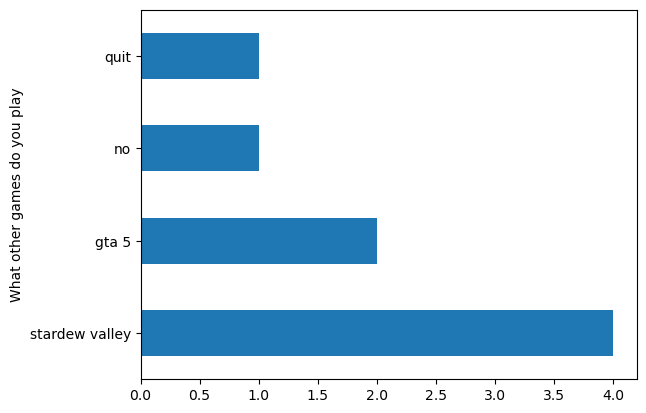

In [67]:
user_input['other_game'].value_counts().plot(kind='barh', xlabel='What other games do you play')

<AxesSubplot:ylabel='How much time you spend on play games?'>

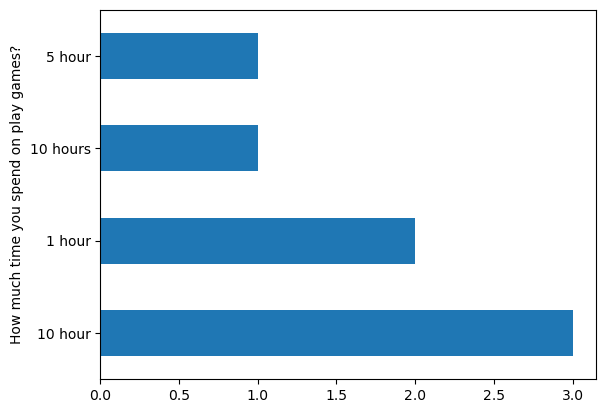

In [68]:
user_input['time'].value_counts().plot(kind='barh', xlabel='How much time you spend on play games?')